# Reproduce figure 10 of Arnal et al 2024
### P and SWE pre processing to climatological medians

In [551]:
# reproduce figure 10 of Arnal et al 2024
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


In [552]:
P = xr.open_dataset("../../CH_data/CH_input_data/P_Camels.nc")
display(P)
SWE= xr.open_dataset("../../CH_data/CH_input_data/SWE_Camels.nc")
display(SWE)
target_periods = ['01/01-30/09','01/02-30/09','01/03-30/09','01/04-30/09','01/05-30/09','01/06-30/09','01/07-30/09','01/08-30/09','01/09-30/09']

<xarray.Dataset>
Dimensions:        (lle: 3, nday: 14610, station: 331)
Coordinates:
  * station        (station) object '2004' '2007' '2009' ... '6010' '6011'
  * nday           (nday) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-12-31
  * lle            (lle) object 'lon' 'lat' 'elev'
Data variables:
    LLE            (station, lle) float64 ...
    precipitation  (nday, station) float64 ...

<xarray.Dataset>
Dimensions:          (station_id: 331, time: 14610)
Coordinates:
    Station_ID       (station_id) object ...
  * time             (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-12-31
    lon              (station_id) float64 ...
    lat              (station_id) float64 ...
Dimensions without coordinates: station_id
Data variables:
    swe              (time, station_id) float64 ...
    Projection_Type  float64 ...

In [553]:
# Initialize an empty dictionary to store results for each target period
cumulative_precipitation = {}

# Loop over each target period
for period in target_periods:
    start_date, end_date = period.split('-')
    start_day, start_month = map(int, start_date.split('/'))
    end_day, end_month = map(int, end_date.split('/'))
    
    # Filter dataset for the target period across all years
    mask = (P['nday'].dt.month > start_month) | \
           ((P['nday'].dt.month == start_month) & (P['nday'].dt.day >= start_day))
    mask &= (P['nday'].dt.month < end_month) | \
            ((P['nday'].dt.month == end_month) & (P['nday'].dt.day <= end_day))
    
    filtered_ds = P.where(mask, drop=True)
    
    # Group by year and station and calculate cumulative precipitation
    yearly_precip = (
        filtered_ds['precipitation']
        .groupby(filtered_ds['nday'].dt.year)
        .sum(dim='nday')
    )
    
    # Store the result for this period
    cumulative_precipitation[period] = yearly_precip

# Example: Display results for one period (optional)
display(cumulative_precipitation[target_periods[8]])
display(cumulative_precipitation)

<xarray.DataArray 'precipitation' (year: 40, station: 331)>
array([[138.81, 190.25, 183.83, ...,   0.  ,   0.  , 511.77],
       [ 77.69, 112.4 ,  81.99, ...,   0.  ,   0.  , 347.75],
       [149.05, 170.83, 118.29, ...,   0.  ,   0.  , 300.05],
       ...,
       [ 32.55,  35.86,  57.7 , ...,  79.21,  69.17,  48.28],
       [ 41.74,  59.18,  44.48, ..., 113.24, 127.32,  88.38],
       [ 98.61, 130.03,  56.4 , ...,  75.12, 136.94,  85.91]])
Coordinates:
  * station  (station) object '2004' '2007' '2009' ... '6009' '6010' '6011'
  * year     (year) int64 1981 1982 1983 1984 1985 ... 2016 2017 2018 2019 2020

{'01/01-30/09': <xarray.DataArray 'precipitation' (year: 40, station: 331)>
 array([[ 843.23, 1262.8 , 1234.08, ...,    0.  ,    0.  , 1796.54],
        [ 885.62, 1269.09,  894.35, ...,    0.  ,    0.  , 1323.7 ],
        [ 925.68, 1543.83,  956.41, ...,    0.  ,    0.  , 1548.9 ],
        ...,
        [ 691.73, 1324.9 ,  996.39, ..., 1232.46, 1213.52, 1087.82],
        [ 694.18, 1131.29,  861.16, ..., 1261.62, 1286.53, 1098.99],
        [ 777.65, 1153.49,  873.07, ..., 1181.84, 1404.32,  986.05]])
 Coordinates:
   * station  (station) object '2004' '2007' '2009' ... '6009' '6010' '6011'
   * year     (year) int64 1981 1982 1983 1984 1985 ... 2016 2017 2018 2019 2020,
 '01/02-30/09': <xarray.DataArray 'precipitation' (year: 40, station: 331)>
 array([[ 728.26, 1006.72, 1042.01, ...,    0.  ,    0.  , 1741.81],
        [ 785.27, 1075.63,  750.24, ...,    0.  ,    0.  , 1273.47],
        [ 867.46, 1356.76,  826.06, ...,    0.  ,    0.  , 1503.39],
        ...,
        [ 532.18,  878.43, 

In [554]:
# Initialize an empty dictionary to store climatological medians for each target period
climatological_medians = {}

# Loop over each target period
for period, data in cumulative_precipitation.items():
    # Calculate the median across the "year" dimension for each station
    median_precipitation = data.median(dim="year")
    
    # Store the result in the climatological_medians dictionary
    climatological_medians[period] = median_precipitation

display(climatological_medians)
# Example: Display the climatological median for one target period
display(climatological_medians['01/04-30/09'])


"""
target_period = '01/04-30/09'  # Beispiel für ein Target-Period

# Hole den klimatologischen Median für das Target-Period und Basin 2299
basin_2007_mean = climatological_medians[target_period].sel(station='2007')
print(f"Klimatologischer Median für Basin 2007 im Zeitraum {target_period}: {basin_2007_mean.values}")
"""

{'01/01-30/09': <xarray.DataArray 'precipitation' (station: 331)>
 array([ 813.785, 1274.48 ,  972.095,  921.79 , 1387.925, 1005.675,
        1158.135, 1259.015, 1408.245, 1240.315, 1384.685, 1317.885,
        1353.23 ,  922.79 , 1289.5  ,  961.3  ,  961.3  ,  961.3  ,
        1043.415, 1254.51 , 1372.27 , 1061.93 , 1164.13 ,  888.235,
        1054.61 , 1040.965, 1090.515,  939.855, 1270.815, 1029.985,
         755.405,  729.635, 1242.85 , 1234.77 ,  821.14 ,  775.23 ,
        1317.885,  919.685,  764.705, 1092.685, 1017.94 , 1557.49 ,
        1116.83 , 1219.645, 1270.32 , 1295.39 , 1046.095, 1255.85 ,
         872.645, 1347.63 , 1428.795, 1294.315, 1390.395,  768.41 ,
         901.275, 1359.275, 1289.73 , 1520.365, 1093.8  , 1004.51 ,
         940.755, 1390.39 , 1094.355, 1023.99 , 1144.875,  975.71 ,
        1047.8  , 1040.595, 1205.05 ,  902.295, 1188.245,  796.065,
        1020.4  , 1033.495, 1186.725, 1310.57 ,  888.8  , 1067.59 ,
         769.365,  989.87 , 1162.335, 1531.625, 13

<xarray.DataArray 'precipitation' (station: 331)>
array([ 621.24 ,  825.165,  677.66 ,  660.475, 1055.03 ,  745.44 ,
        903.37 ,  919.235,  983.12 ,  996.395, 1076.4  , 1032.16 ,
        982.76 ,  664.29 ,  949.705,  666.125,  666.125,  666.125,
        762.455,  908.27 , 1079.56 ,  803.8  ,  873.745,  652.01 ,
        806.535,  789.055,  823.94 ,  646.6  ,  941.61 ,  758.84 ,
        631.61 ,  597.625, 1005.92 ,  929.5  ,  680.85 ,  645.535,
       1032.16 ,  746.265,  641.675,  860.275,  794.565, 1170.12 ,
        832.53 ,  967.77 ,  892.415,  983.59 ,  788.36 ,  908.97 ,
        662.565, 1031.01 , 1132.535,  982.97 , 1049.795,  640.775,
        666.475, 1021.245,  947.53 , 1143.415,  808.415,  764.58 ,
        668.385, 1049.81 ,  801.64 ,  735.055,  893.375,  742.835,
        790.12 ,  785.37 ,  883.07 ,  686.185,  929.225,  631.385,
        780.   ,  756.125,  837.075,  972.845,  625.295,  808.62 ,
        578.745,  767.17 ,  820.665, 1108.34 , 1076.365,  679.455,
        741.665,  677.78 , 1087.195,  838.3  ,  947.33 ,  728.86 ,
        919.87 ,  715.99 , 1015.57 ,  611.245,  842.79 ,  810.205,
       1121.42 ,  973.65 ,  762.72 , 1017.86 ,  739.23 ,  784.4  ,
        676.2  ,  981.805,  869.77 ,  593.6  ,  996.325,  683.165,
        756.93 ,  976.215,  978.75 ,  693.965,  708.695,  603.68 ,
        606.635,  957.435,  836.295,  745.84 , 1016.79 ,  948.295,
        937.975,  779.31 ,  781.095,  738.945,  908.205, 1259.02 ,
       1025.875,  566.285,  930.39 ,  666.15 ,  913.95 ,  748.55 ,
        636.26 ,  553.745, 1200.78 ,  621.435,  598.225,  732.055,
        863.945, 1100.285, 1031.245,  605.8  , 1107.415,  652.8  ,
       1048.53 ,  979.425,  786.16 , 1119.13 ,  585.62 ,  743.78 ,
        872.47 , 1080.975, 1012.92 ,  780.385,  687.64 ,  730.095,
        778.875,  612.65 ,  969.085,  793.825,  744.52 ,  861.525,
        672.545,  686.125,  679.23 ,  665.995,  903.05 , 1028.88 ,
        923.285,  953.76 ,  565.12 ,  672.565,  641.87 , 1093.305,
        642.2  ,  624.69 ,  621.27 ,  661.4  ,  982.74 ,  643.23 ,
       1195.395,  624.045, 1078.68 ,  782.17 , 1039.59 ,  864.685,
        673.96 ,  810.34 , 1060.3  , 1073.85 ,  982.   ,  690.575,
        701.32 , 1000.85 , 1086.655,  597.175,  844.62 ,  970.305,
        831.29 ,  598.05 , 1072.945,  747.14 ,  987.985,  713.725,
        802.145,  698.48 ,  786.865,  969.545, 1094.69 , 1183.305,
        666.075, 1037.44 ,  711.715, 1179.85 ,  696.115, 1206.62 ,
        779.555,  780.325,  528.325,  829.355,  974.675, 1201.465,
        689.065, 1043.51 ,  925.88 , 1185.34 ,  677.29 ,  625.295,
        628.31 ,  774.685,  810.475,  883.49 ,  816.54 ,  956.88 ,
        810.35 , 1098.765, 1131.515,  879.07 ,  958.215, 1206.7  ,
        943.865, 1156.935, 1072.425, 1206.69 , 1276.055, 1182.705,
        913.39 ,  805.19 , 1036.22 , 1193.255, 1089.71 , 1269.28 ,
       1231.4  ,  838.375, 1303.18 , 1180.575, 1359.68 , 1325.385,
       1198.675,  909.435,  621.545,  601.01 ,  787.175,  781.375,
        644.54 ,  516.155,  523.71 ,  554.695,  480.555,  477.29 ,
        512.18 ,  803.8  ,  556.96 ,  604.35 ,  590.35 ,  599.055,
        636.19 ,  889.18 ,  714.855,  587.25 ,  872.695,  902.37 ,
        965.395,  853.   , 1027.675, 1221.36 , 1000.985, 1029.575,
        646.46 ,  734.585,  582.07 ,  871.905,  703.37 ,  775.265,
        712.695,  683.615,  788.815,  767.245,  682.03 ,  789.02 ,
        771.645,  775.245,  588.045,  759.17 ,  734.76 ,  589.75 ,
        699.57 ,  731.24 ,  766.995,  793.625,  867.12 ,  737.6  ,
        799.725,  848.74 ,  800.67 ,  904.41 ,  861.29 ,  750.93 ,
        831.145,  740.66 ,  765.005,  796.89 ,  729.115,  788.69 ,
        854.285,  893.4  ,  840.48 ,  898.245, 1070.535, 1171.275,
       1030.995])
Coordinates:
  * station  (station) object '2004' '2007' '2009' ... '6009' '6010' '6011'

'\ntarget_period = \'01/04-30/09\'  # Beispiel für ein Target-Period\n\n# Hole den klimatologischen Median für das Target-Period und Basin 2299\nbasin_2007_mean = climatological_medians[target_period].sel(station=\'2007\')\nprint(f"Klimatologischer Median für Basin 2007 im Zeitraum {target_period}: {basin_2007_mean.values}")\n'

In [555]:
import xarray as xr

# Create a list of target periods and corresponding precipitation data
target_periods = list(climatological_medians.keys())
data_arrays = list(climatological_medians.values())

# Combine the data arrays into a single xarray DataArray
p_clim_median = xr.concat(data_arrays, dim="target_period")

# Assign target periods as a new coordinate
p_clim_median = p_clim_median.assign_coords(target_period=("target_period", target_periods))

# Rename the dimensions and data variable for clarity
p_clim_median = p_clim_median.rename({"station": "Station_ID"})
p_clim_median.name = "p_clim_median"

# Convert to an xarray Dataset
P_climatological = p_clim_median.to_dataset()


# Print the structure of the resulting xarray Dataset
print(P_climatological)


<xarray.Dataset>
Dimensions:        (Station_ID: 331, target_period: 9)
Coordinates:
  * Station_ID     (Station_ID) object '2004' '2007' '2009' ... '6010' '6011'
  * target_period  (target_period) <U11 '01/01-30/09' ... '01/09-30/09'
Data variables:
    p_clim_median  (target_period, Station_ID) float64 813.8 1.274e+03 ... 131.3


In [556]:
# Extract the p_clim_median values for Station_ID 2355
basin_2355_p_values = P_climatological.sel(Station_ID='2355')

# Convert to a pandas DataFrame for a better display (optional)
basin_2355_p_values_df = basin_2355_p_values.to_dataframe().reset_index()

# Print the results
print(basin_2355_p_values_df)

  target_period Station_ID  p_clim_median
0   01/01-30/09       2355        832.980
1   01/02-30/09       2355        759.395
2   01/03-30/09       2355        705.545
3   01/04-30/09       2355        652.800
4   01/05-30/09       2355        595.730
5   01/06-30/09       2355        510.315
6   01/07-30/09       2355        375.940
7   01/08-30/09       2355        243.310
8   01/09-30/09       2355         86.040


In [557]:
import xarray as xr

# Define init dates in MM/DD format
init_dates = ['01/01', '01/02', '01/03', '01/04', '01/05', '01/06', '01/07', '01/08', '01/09']

# Initialize a list to store SWE climatological medians for each init date
swe_clim_medians = []

# Loop through each init date and calculate the climatological median
for init_date in init_dates:
    # Parse the init_date into month and day
    day, month = map(int, init_date.split('/'))
    
    # Filter SWE for the specific date (ignoring year)
    swe_for_day = SWE.sel(time=(SWE['time'].dt.month == month) & (SWE['time'].dt.day == day))
    
    # Calculate the climatological median over time for each station
    swe_median_for_day = swe_for_day.median(dim='time')
    
    # Add a new coordinate for the init_date
    swe_median_for_day = swe_median_for_day.assign_coords(init_date=init_date)
    swe_clim_medians.append(swe_median_for_day)

# Combine all init date medians into a single xarray Dataset
SWE_climatological = xr.concat(swe_clim_medians, dim='init_date')

# Rename the data variable for clarity
SWE_climatological = SWE_climatological.rename({'swe': 'swe_clim_median'})

# Print the structure of the resulting xarray Dataset
print(SWE_climatological)



<xarray.Dataset>
Dimensions:          (init_date: 9, station_id: 331)
Coordinates:
    lon              (station_id) float64 5.587e+05 5.049e+05 ... 6.934e+05
    lat              (station_id) float64 1.753e+05 1.593e+05 ... 1.138e+05
    Station_ID       (station_id) object '2004' '2007' '2009' ... '6010' '6011'
  * init_date        (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Dimensions without coordinates: station_id
Data variables:
    swe_clim_median  (init_date, station_id) float64 4.32 69.83 ... 0.0 1.27
    Projection_Type  (init_date) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


In [558]:
# Extract the index for Basin 2355
basin_index = SWE_climatological['Station_ID'].values.tolist().index('2355')

# Select the values for Basin 2355 for all init dates
basin_2355_values = SWE_climatological['swe_clim_median'].isel(station_id=basin_index)

# Convert the values to a pandas DataFrame for better readability
basin_2355_df = basin_2355_values.to_dataframe().reset_index()

# Print the results
print(basin_2355_df)


  init_date            lon           lat Station_ID  swe_clim_median
0     01/01  785633.417085  181733.12606       2355          172.435
1     01/02  785633.417085  181733.12606       2355          231.700
2     01/03  785633.417085  181733.12606       2355          290.150
3     01/04  785633.417085  181733.12606       2355          334.100
4     01/05  785633.417085  181733.12606       2355          261.585
5     01/06  785633.417085  181733.12606       2355          145.470
6     01/07  785633.417085  181733.12606       2355           10.550
7     01/08  785633.417085  181733.12606       2355            0.000
8     01/09  785633.417085  181733.12606       2355            0.000


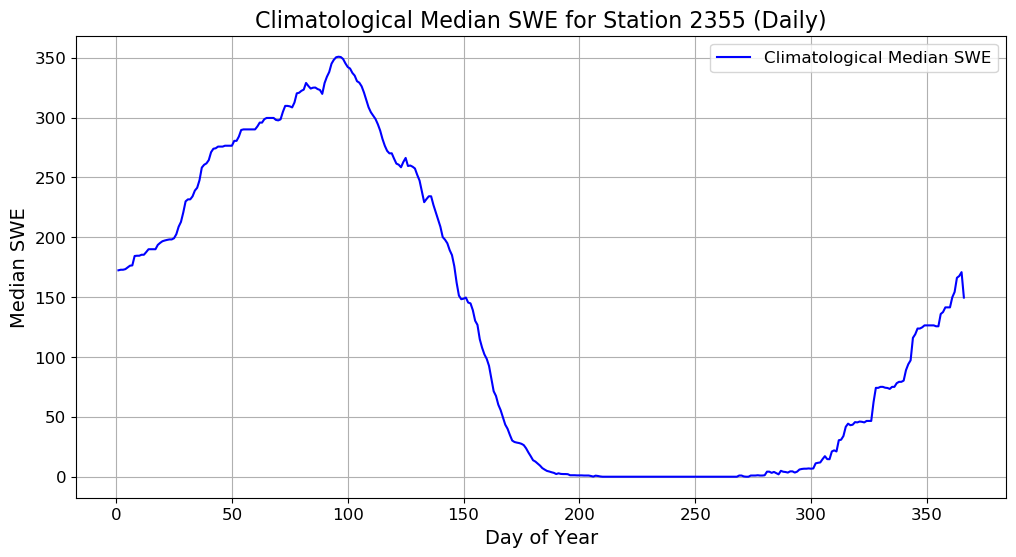

In [559]:
import matplotlib.pyplot as plt

# Berechne den Tag-im-Jahr für die Zeitdimension
SWE = SWE.assign_coords(day_of_year=SWE['time'].dt.dayofyear)

# Berechne den climatologischen Median für jeden Tag im Jahr und Station 2355
station_2355_id = SWE['Station_ID'].values.tolist().index('2355')  # Index für Station 2355
climatological_median_2355 = SWE['swe'].isel(station_id=station_2355_id).groupby('day_of_year').median(dim='time')

# Plotten des climatologischen Medians für jeden Tag im Jahr
plt.figure(figsize=(12, 6))
plt.plot(climatological_median_2355['day_of_year'], climatological_median_2355, label='Climatological Median SWE', color='blue')

# Hinzufügen von Labels, Titel und Legende
plt.xlabel('Day of Year')
plt.ylabel('Median SWE')
plt.title('Climatological Median SWE for Station 2355 (Daily)')
plt.grid()
plt.legend()

# Plot anzeigen
plt.show()


In [560]:
# nun haben wir P (P_climatological) und SWE (SWE_climatological)

### Calculate ratio P/SWE

In [579]:
import xarray as xr
import pandas as pd
import numpy as np

# Liste zum Speichern der Ergebnisse
results = []

# Schleife über alle init_dates und target_periods
for init_date in SWE_climatological.init_date.values:
    for target_period in P_climatological.target_period.values:
        # Parse target_period und init_date
        target_start, target_end = target_period.split('-')
        target_start_day, target_start_month = map(int, target_start.split('/'))
        target_end_day, target_end_month = map(int, target_end.split('/'))
        init_day, init_month = map(int, init_date.split('/'))
        
        # Prüfen, ob init_date in target_period liegt
        """if (target_start_month < init_month < target_end_month) or \
           (init_month == target_start_month and init_day >= target_start_day) or \
           (init_month == target_end_month and init_day <= target_end_day):"""
        if (target_start_month >= init_month ):    
            # Greife auf SWE- und P-Daten zu
            swe_values = SWE_climatological.sel(init_date=init_date).swe_clim_median.squeeze()
            p_values = P_climatological.sel(target_period=target_period).p_clim_median.squeeze()
            
            # Sicherstellen, dass beide Arrays 1D sind
            swe_values = swe_values.values.flatten()
            p_values = p_values.values.flatten()
            
            # Berechne das Verhältnis P/SWE
            with np.errstate(divide='ignore', invalid='ignore'):  # Um Division durch Null zu behandeln
                ratio = np.divide(p_values, swe_values, where=(swe_values != 0))
            
            # Erstelle ein temporäres Dataset mit allen Dimensionen
            temp_ds = xr.Dataset(
                {
                    "P_values": (("Station_ID"), p_values),
                    "SWE_values": (("Station_ID"), swe_values),
                    "P_to_SWE_ratio": (("Station_ID"), ratio),
                },
                coords={
                    "Station_ID": SWE_climatological.Station_ID.values,
                    "init_date": [str(init_date)],  # Konvertiere zu String
                    "target_period": [str(target_period)],  # Konvertiere zu String
                }
            )
            
            # Anhängen an die Ergebnisse
            results.append(temp_ds)

# Sicherstellen, dass Ergebnisse vorhanden sind
if len(results) > 0:
    # Kombiniere die Ergebnisse in ein einzelnes Dataset entlang neuer Dimensionen
    combined_results = xr.concat(
        results, 
        dim="combination"
    )
    
    # Füge die init_date und target_period-Dimensionen als Koordinaten hinzu
    combined_results = combined_results.assign_coords(
        init_date=("combination", [ds.init_date.values[0] for ds in results]),
        target_period=("combination", [ds.target_period.values[0] for ds in results])
    )

    # Ausgabe der Struktur des neuen Datasets
    print(combined_results)
else:
    print("Keine Ergebnisse gefunden. Überprüfen Sie Ihre Eingabedaten.")


<xarray.Dataset>
Dimensions:         (Station_ID: 331, combination: 45)
Coordinates:
    target_period   (combination) <U11 '01/01-30/09' ... '01/09-30/09'
    init_date       (combination) <U5 '01/01' '01/01' ... '01/08' '01/09'
  * Station_ID      (Station_ID) object '2004' '2007' '2009' ... '6010' '6011'
Dimensions without coordinates: combination
Data variables:
    P_values        (combination, Station_ID) float64 813.8 1.274e+03 ... 131.3
    SWE_values      (combination, Station_ID) float64 4.32 69.83 ... 0.0 1.27
    P_to_SWE_ratio  (combination, Station_ID) float64 188.4 18.25 ... 0.0 103.4


In [580]:
display(combined_results.sel(Station_ID='2355'))
filtered_result = combined_results.where(combined_results.target_period == '01/09-30/09', drop=True)
display(filtered_result)
        

<xarray.Dataset>
Dimensions:         (combination: 45)
Coordinates:
    target_period   (combination) <U11 '01/01-30/09' ... '01/09-30/09'
    init_date       (combination) <U5 '01/01' '01/01' ... '01/08' '01/09'
    Station_ID      <U4 '2355'
Dimensions without coordinates: combination
Data variables:
    P_values        (combination) float64 833.0 759.4 705.5 ... 86.04 86.04
    SWE_values      (combination) float64 172.4 172.4 172.4 ... 0.0 0.0 0.0
    P_to_SWE_ratio  (combination) float64 4.831 4.404 4.092 ... 0.0 759.4 3.508

<xarray.Dataset>
Dimensions:         (Station_ID: 331, combination: 9)
Coordinates:
    target_period   (combination) <U11 '01/09-30/09' ... '01/09-30/09'
    init_date       (combination) <U5 '01/01' '01/02' ... '01/08' '01/09'
  * Station_ID      (Station_ID) object '2004' '2007' '2009' ... '6010' '6011'
Dimensions without coordinates: combination
Data variables:
    P_values        (combination, Station_ID) float64 84.83 116.7 ... 131.3
    SWE_values      (combination, Station_ID) float64 4.32 69.83 ... 0.0 1.27
    P_to_SWE_ratio  (combination, Station_ID) float64 19.64 1.671 ... 0.0 103.4

In [581]:
import os
crpss_data_path = "../../CH_data/CH_camels_output_data/probabilistic_niv_lim"
files = [os.path.join(crpss_data_path, f) for f in os.listdir(crpss_data_path) if f.endswith(".nc")]

# Erstelle eine leere Liste für die Datasets
datasets = []

for file in files:
    # Lade das Dataset
    ds = xr.open_dataset(file)

    # Extrahiere die Station_ID aus dem Dateinamen (z. B. `probabilistic_verification_basin_XXXX.nc`)
    station_id = os.path.basename(file).split("_")[3].split(".")[0]  # Passe diesen Code an, wenn die Struktur anders ist

    # Füge eine neue Dimension für die Station_ID hinzu
    ds = ds.expand_dims({"Station_ID": [station_id]})
    datasets.append(ds)

# Kombiniere die Datasets entlang der Station_ID-Dimension
crpss_dataset = xr.concat(datasets, dim="Station_ID")

# Optional: Speichere das kombinierte Dataset
crpss_dataset.to_netcdf("combined_stations.nc")

# Zeige die Struktur des kombinierten Datasets
display(crpss_dataset)

<xarray.Dataset>
Dimensions:            (Station_ID: 12, bins: 11, event: 2, init_date: 9, iteration: 100, rate: 2, target_period: 9)
Coordinates:
  * init_date          (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * iteration          (iteration) int32 1 2 3 4 5 6 7 ... 94 95 96 97 98 99 100
  * bins               (bins) float64 0.0 0.1 0.2 0.3 0.4 ... 0.7 0.8 0.9 1.0
  * rate               (rate) object 'FAR' 'HR'
  * target_period      (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * event              (event) float64 0.33 0.66
  * Station_ID         (Station_ID) object '2105' '2185' ... '2607' '2617'
Data variables:
    CRPSS              (Station_ID, init_date, target_period, iteration) float64 -0.18 ... -0.04
    fairCRPSS          (Station_ID, init_date, target_period, iteration) float64 -0.0 ... 0.16
    Reliability_index  (Station_ID, init_date, target_period, iteration) float64 0.84 ... 0.75
    ROC_AUC            (Station_ID, init_date, target_period, iteration, event) float64 0.43 ... 0.55
    ROC                (Station_ID, init_date, target_period, iteration, rate, bins, event) float64 1.0 ... 0.0
Attributes:
    info:     Various probabilistic verification metrics calculated for basin...

In [582]:
combined_results.to_netcdf("../../CH_data/CH_camels_output_data/intermediate_data_evaluation/combined_results.nc")

# crpss_dataset speichern
crpss_dataset.to_netcdf("../../CH_data/CH_camels_output_data/intermediate_data_evaluation/crpss_dataset.nc")

In [583]:
# Display the CRPSS dataset
display(crpss_dataset)
# Extrahiere die Werte von combination in target_period und init_date
target_periods = combined_results['target_period'].values
init_dates = combined_results['init_date'].values

# Erstelle ein neues Dataset mit target_period und init_date als Dimensionen
p_swe_ratio = combined_results.assign_coords(
    target_period=("combination", target_periods),
    init_date=("combination", init_dates)
).set_index(combination=["target_period", "init_date"]).unstack("combination")
p_swe_ratio = p_swe_ratio.sel(Station_ID=crpss_dataset['Station_ID'])
display(p_swe_ratio)






























<xarray.Dataset>
Dimensions:            (Station_ID: 12, bins: 11, event: 2, init_date: 9, iteration: 100, rate: 2, target_period: 9)
Coordinates:
  * init_date          (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * iteration          (iteration) int32 1 2 3 4 5 6 7 ... 94 95 96 97 98 99 100
  * bins               (bins) float64 0.0 0.1 0.2 0.3 0.4 ... 0.7 0.8 0.9 1.0
  * rate               (rate) object 'FAR' 'HR'
  * target_period      (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * event              (event) float64 0.33 0.66
  * Station_ID         (Station_ID) object '2105' '2185' ... '2607' '2617'
Data variables:
    CRPSS              (Station_ID, init_date, target_period, iteration) float64 -0.18 ... -0.04
    fairCRPSS          (Station_ID, init_date, target_period, iteration) float64 -0.0 ... 0.16
    Reliability_index  (Station_ID, init_date, target_period, iteration) float64 0.84 ... 0.75
    ROC_AUC            (Station_ID, init_date, target_period, iteration, event) float64 0.43 ... 0.55
    ROC                (Station_ID, init_date, target_period, iteration, rate, bins, event) float64 1.0 ... 0.0
Attributes:
    info:     Various probabilistic verification metrics calculated for basin...

<xarray.Dataset>
Dimensions:         (Station_ID: 12, init_date: 9, target_period: 9)
Coordinates:
  * Station_ID      (Station_ID) object '2105' '2185' '2244' ... '2607' '2617'
  * target_period   (target_period) object '01/01-30/09' ... '01/09-30/09'
  * init_date       (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Data variables:
    P_values        (Station_ID, target_period, init_date) float64 768.4 ... 67.07
    SWE_values      (Station_ID, target_period, init_date) float64 166.8 ... 0.0
    P_to_SWE_ratio  (Station_ID, target_period, init_date) float64 4.607 ... 11.43

array([[-0.01 ,  0.135,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [-0.09 , -0.02 ,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [-0.06 ,  0.04 ,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [ 0.   ,  0.155,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [-0.09 , -0.025,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [ 0.03 ,  0.05 ,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [-0.065, -0.015,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [-0.04 , -0.05 ,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [ 0.03 ,  0.07 ,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [-0.065, -0.09 ,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [-0.02 ,  0.09 ,    nan,    nan,    nan,    nan,    nan,    nan,
           nan],
       [-0.1  , -0.00

array([[4.39555169, 3.27306817,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [6.73783784, 4.86100279,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [3.68176339, 2.81953846,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [3.75349727, 2.68316406,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [5.13190661, 3.29725   ,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [4.94651163, 3.545     ,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [3.84592992, 2.90598778,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [4.40394931, 3.27749245,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],


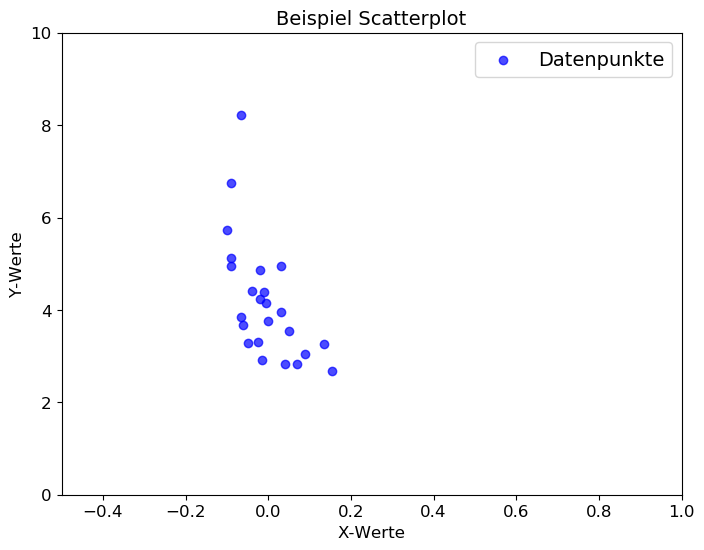

In [584]:


# Median über die Dimension 'iteration' berechnen
reduced_crpss_dataset = crpss_dataset.median(dim='iteration')

x = reduced_crpss_dataset.sel(target_period='1Feb-30Sep')['CRPSS'].values
display(x)
target_period = '01/02-30/09'  # Specify the target period
y = p_swe_ratio.sel(target_period=target_period)['P_to_SWE_ratio'].values
display(y)

# Scatterplot erstellen
plt.figure(figsize=(8, 6))  # Optionale Größe des Plots
plt.scatter(x, y, color='blue', alpha=0.7, label='Datenpunkte')  # Erstelle den Scatterplot

# Achsenbeschriftungen hinzufügen
plt.xlabel("X-Werte", fontsize=12)
plt.ylabel("Y-Werte", fontsize=12)

# Titel und Legende
plt.title("Beispiel Scatterplot", fontsize=14)
plt.legend()

# Achsengrenzen festlegen
plt.xlim(-0.5, 1)  # X-Achse von -0.5 bis 1
plt.ylim(0, 10)    # Y-Achse von 0 bis 10

# Plot anzeigen
plt.show()



C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


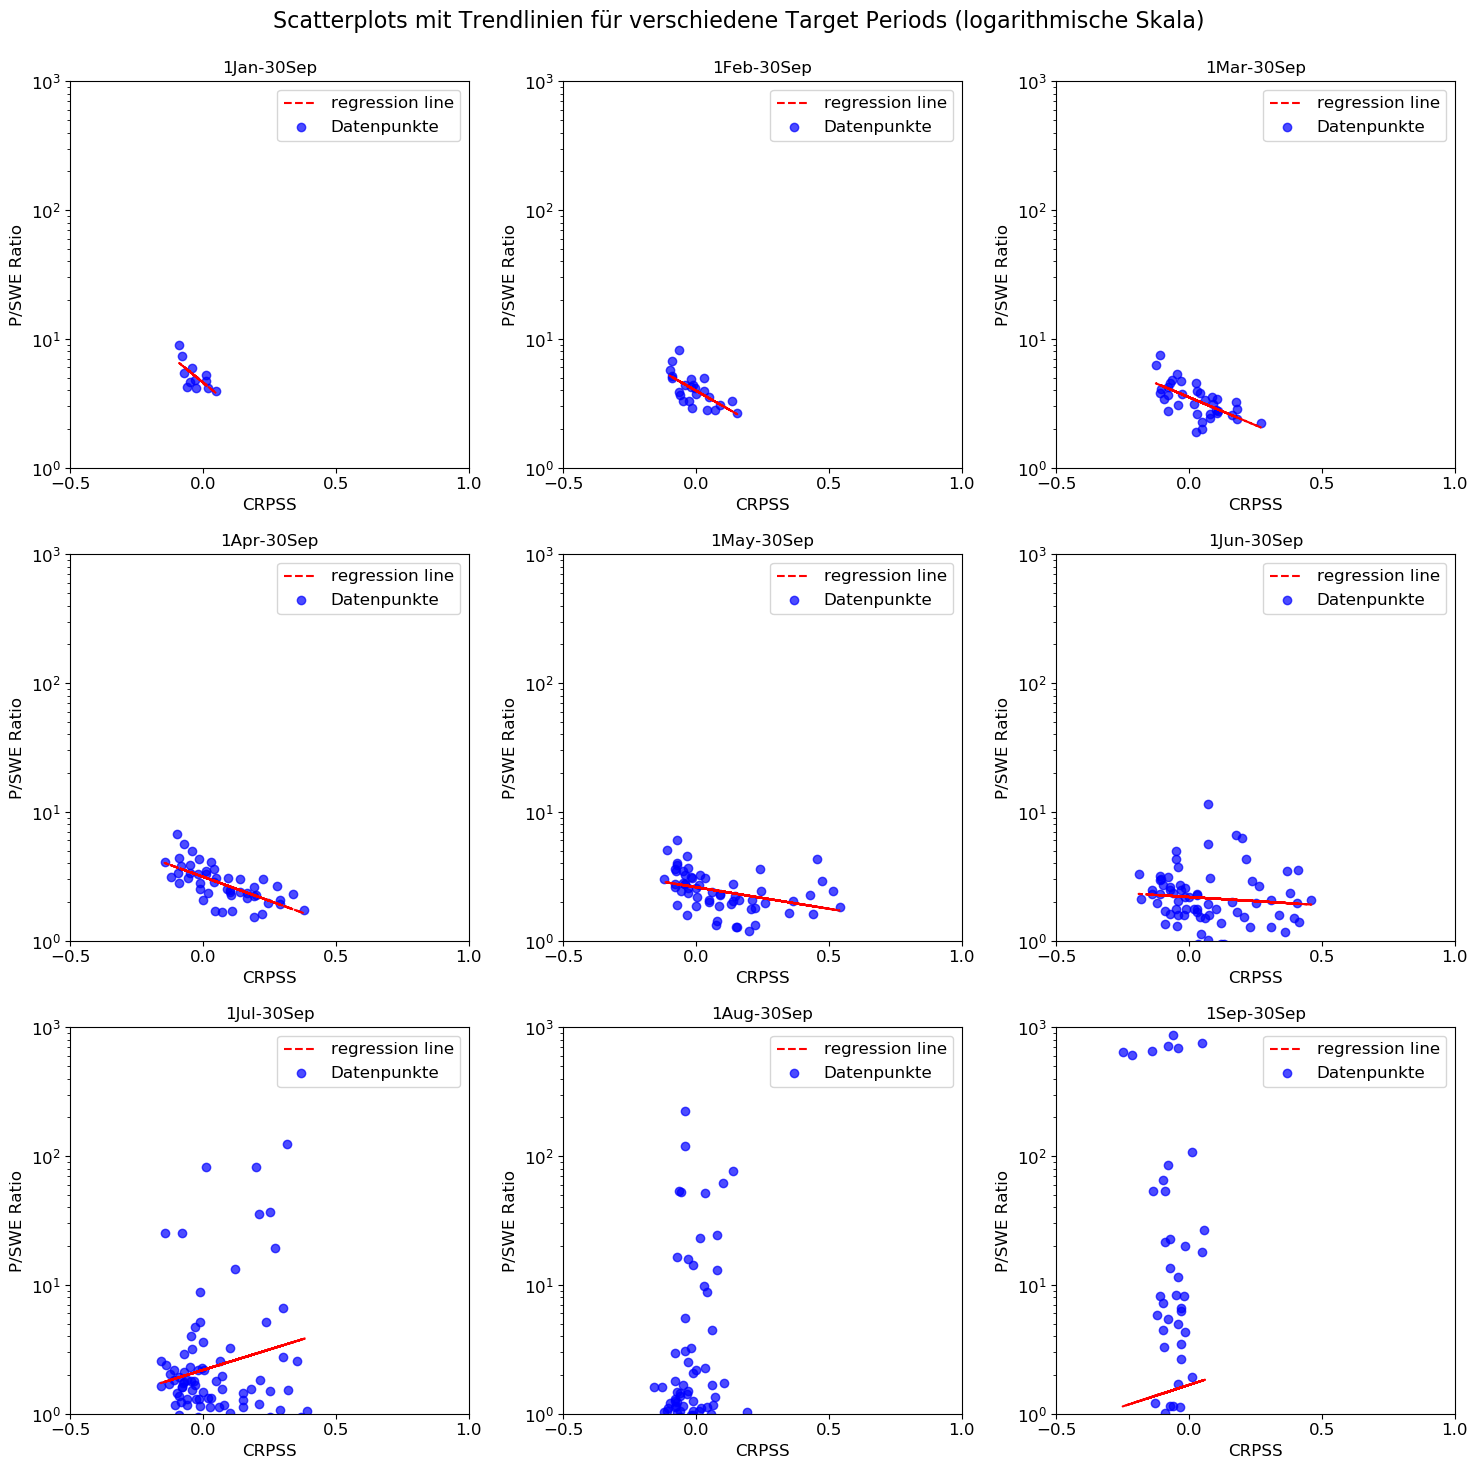

In [585]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Schriftgrößen global anpassen
plt.rcParams.update({
    'font.size': 14,          # Allgemeine Schriftgröße
    'axes.titlesize': 16,     # Titelgröße
    'axes.labelsize': 14,     # Achsenbeschriftung
    'xtick.labelsize': 12,    # X-Tick-Beschriftung
    'ytick.labelsize': 12,    # Y-Tick-Beschriftung
    'legend.fontsize': 12,    # Legende
})
# Definiere die Target Periods
target_periods_crpss = ['1Jan-30Sep', '1Feb-30Sep', '1Mar-30Sep', '1Apr-30Sep', 
                        '1May-30Sep', '1Jun-30Sep', '1Jul-30Sep', '1Aug-30Sep', 
                        '1Sep-30Sep']
target_periods_ratio = ['01/01-30/09', '01/02-30/09', '01/03-30/09', '01/04-30/09', 
                        '01/05-30/09', '01/06-30/09', '01/07-30/09', '01/08-30/09', 
                        '01/09-30/09']

# Erstelle ein Grid für die Subplots (3x3)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Scatterplots mit Trendlinien für verschiedene Target Periods (logarithmische Skala)", fontsize=16)

# Iteriere über die Target Periods und erstelle die Scatterplots mit Trendlinien
for i, (tp_crpss, tp_ratio) in enumerate(zip(target_periods_crpss, target_periods_ratio)):
    row = i // 3
    col = i % 3
    
    # Daten extrahieren
    x = reduced_crpss_dataset.sel(target_period=tp_crpss)['CRPSS'].values
    y = p_swe_ratio.sel(target_period=tp_ratio)['P_to_SWE_ratio'].values
    
    # Entferne NaN-Werte
    valid_mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_mask]
    y = y[valid_mask]
    
    # Erstelle Scatterplot im entsprechenden Subplot
    ax = axes[row, col]
    ax.scatter(x, y, color='blue', alpha=0.7, label='Datenpunkte')
    
    # Füge eine Trendlinie hinzu (lineare Regression)
    if len(x) > 1 and len(y) > 1:  # Nur wenn genügend Datenpunkte vorhanden sind
        coeffs = np.polyfit(x, np.log10(y), 1)  # Logarithmische Regression
        trendline = np.poly1d(coeffs)  # Erstelle Trendlinienfunktion
        ax.plot(x, 10**trendline(x), color='red', linestyle='--', label='regression line')
    
    # Setze logarithmische y-Achse
    ax.set_yscale('log')
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[]))  # Nur Hauptwerte anzeigen
    ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))  # Wissenschaftliche Notation (10^x)
    
    # Fixe Achsengrenzen
    ax.set_ylim(10**0, 10**3)  # Von 10^0 bis 10^2 (1 bis 100)
    ax.set_xticks(np.arange(-0.5, 1.1, 0.5))
    ax.set_xlim(-0.5, 1)       # X-Achse von -0.5 bis 1
    
    # Titel und Achsenbeschriftungen
    ax.set_title(tp_crpss, fontsize=12)
    ax.set_xlabel("CRPSS", fontsize=12)
    ax.set_ylabel("P/SWE Ratio", fontsize=12)
    ax.legend()

# Layout optimieren
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Platz für den Supertitel lassen
plt.savefig("C:/Users/lauri/PycharmProjects/FROSTBYTE/CH_data/CH_camels_output_plots/evaluation/P_SWE_ratio_vs_CRPSS.png", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
No handles with labels found to put in legend.
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
No handles with labels found to put in legend.
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
No handles with labels found to put in legend.
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
No handles with labels found to put in legend.
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
No handles with labels found to put in legend.
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\ipykernel_launcher.py:38: Ru

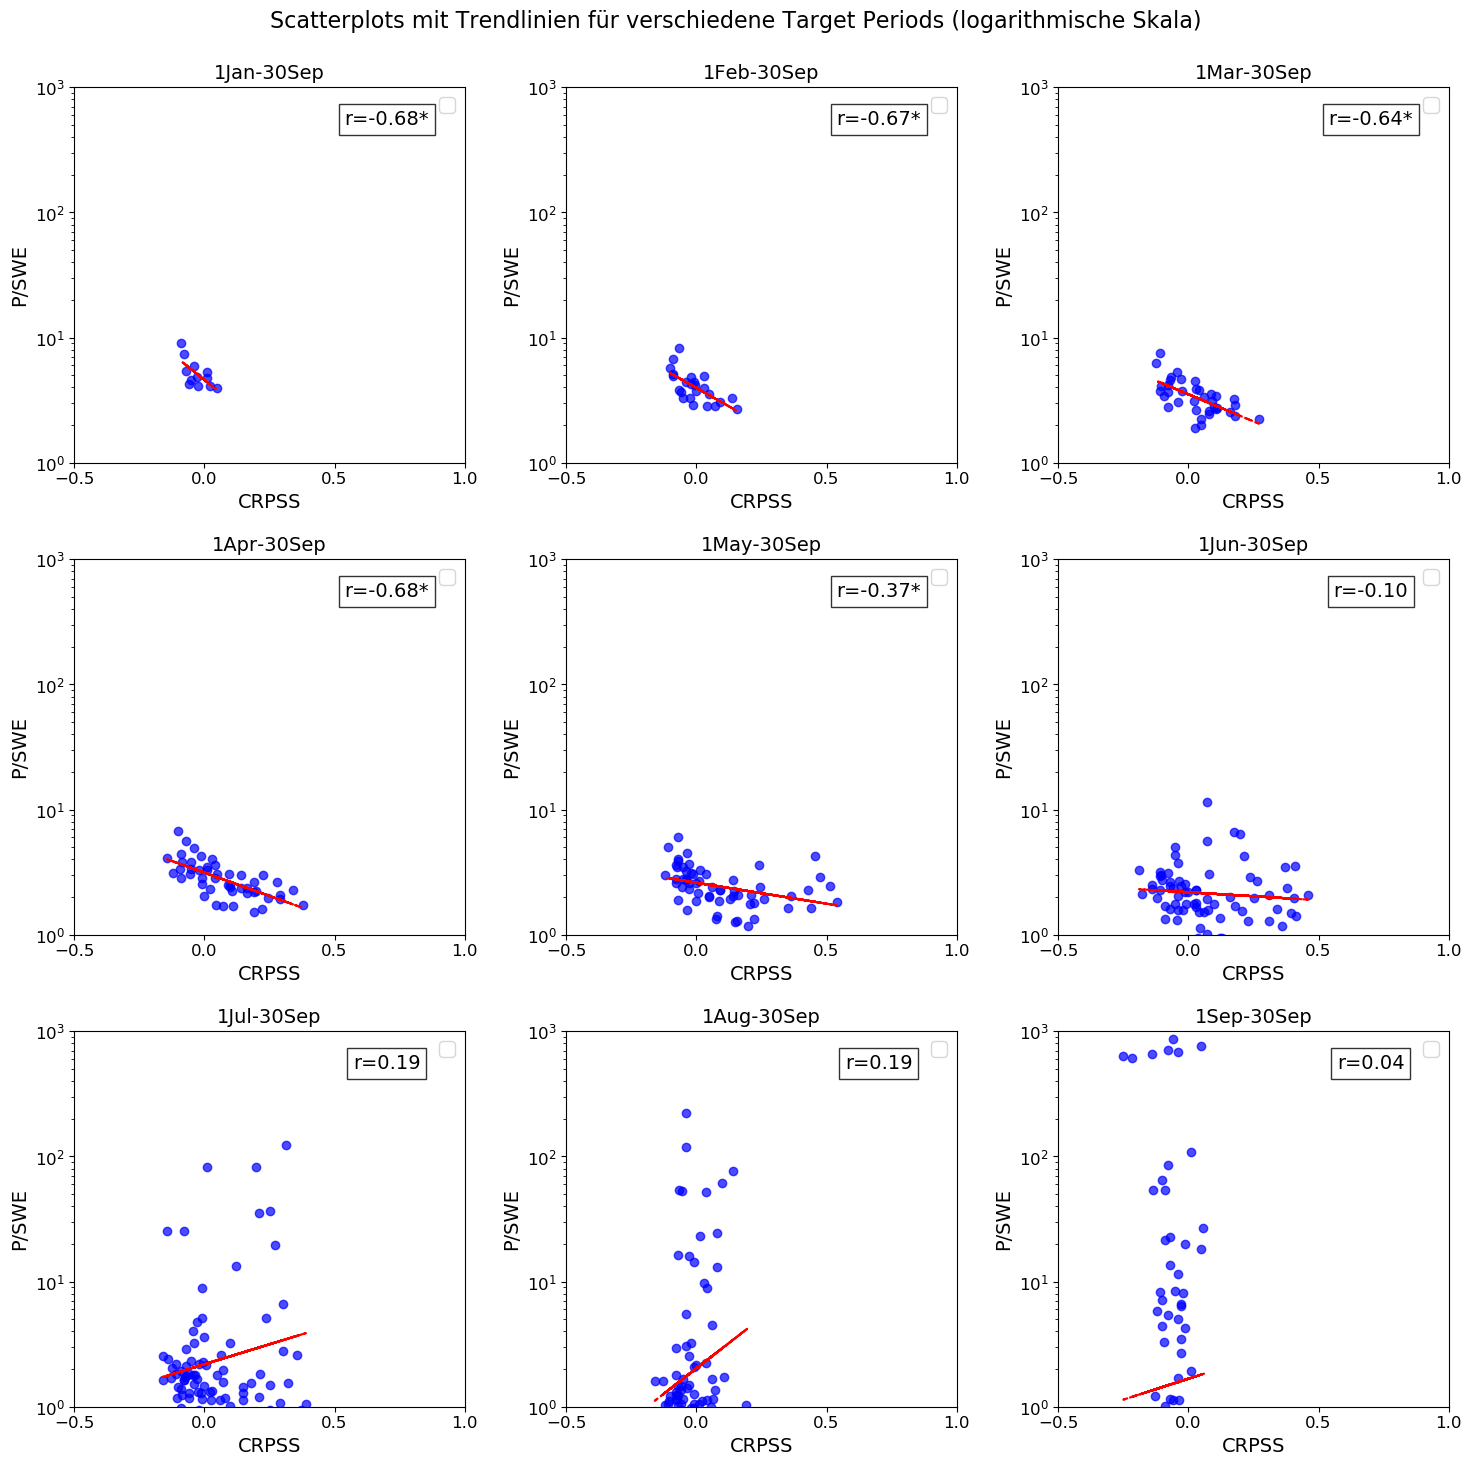

In [592]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import pearsonr  # Import Pearson correlation calculation

# Schriftgrößen global anpassen
plt.rcParams.update({
    'font.size': 16,          # Allgemeine Schriftgröße
    'axes.titlesize': 16,     # Titelgröße
    'axes.labelsize': 16,     # Achsenbeschriftung
    'xtick.labelsize': 12,    # X-Tick-Beschriftung
    'ytick.labelsize': 12,    # Y-Tick-Beschriftung
    #'legend.fontsize': 14,    # Legende
})

# Definiere die Target Periods
target_periods_crpss = ['1Jan-30Sep', '1Feb-30Sep', '1Mar-30Sep', '1Apr-30Sep', 
                        '1May-30Sep', '1Jun-30Sep', '1Jul-30Sep', '1Aug-30Sep', 
                        '1Sep-30Sep']
target_periods_ratio = ['01/01-30/09', '01/02-30/09', '01/03-30/09', '01/04-30/09', 
                        '01/05-30/09', '01/06-30/09', '01/07-30/09', '01/08-30/09', 
                        '01/09-30/09']

# Erstelle ein Grid für die Subplots (3x3)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Scatterplots mit Trendlinien für verschiedene Target Periods (logarithmische Skala)", fontsize=16)

# Iteriere über die Target Periods und erstelle die Scatterplots mit Trendlinien
for i, (tp_crpss, tp_ratio) in enumerate(zip(target_periods_crpss, target_periods_ratio)):
    row = i // 3
    col = i % 3
    
    # Daten extrahieren
    x = reduced_crpss_dataset.sel(target_period=tp_crpss)['CRPSS'].values
    y = p_swe_ratio.sel(target_period=tp_ratio)['P_to_SWE_ratio'].values
    
    # Entferne ungültige Werte: NaN, inf oder y <= 0 (für log10(y))
    valid_mask = ~np.isnan(x) & ~np.isnan(y) & (y > 0)
    x = x[valid_mask]
    y = y[valid_mask]
    
    # Erstelle Scatterplot im entsprechenden Subplot
    ax = axes[row, col]
    ax.scatter(x, y, color='blue', alpha=0.7)
    
    # Füge eine Trendlinie hinzu (lineare Regression)
    if len(x) > 1 and len(y) > 1:  # Nur wenn genügend Datenpunkte vorhanden sind
        coeffs = np.polyfit(x, np.log10(y), 1)  # Logarithmische Regression
        trendline = np.poly1d(coeffs)  # Erstelle Trendlinienfunktion
        ax.plot(x, 10**trendline(x), color='red', linestyle='--')
        
        # Berechne Pearson-Korrelationskoeffizienten
        r, p_value = pearsonr(x, np.log10(y))  # Pearson correlation with log(y)
        significance = '*' if p_value < 0.05 else ''  # Prüfe Signifikanz
        
        # Füge den Pearson-Korrelationskoeffizienten als Text hinzu
        ax.text(0.8, 0.9, f"r={r:.2f}{significance}", transform=ax.transAxes,
                fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=0.8))

    # Setze logarithmische y-Achse
    ax.set_yscale('log')
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[]))  # Nur Hauptwerte anzeigen
    ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))  # Wissenschaftliche Notation (10^x)
    
    # Fixe Achsengrenzen
    ax.set_ylim(10**0, 10**3)  # Von 10^0 bis 10^3 (1 bis 1000)
    ax.set_xticks(np.arange(-0.5, 1.1, 0.5))
    ax.set_xlim(-0.5, 1)       # X-Achse von -0.5 bis 1
    
    # Titel und Achsenbeschriftungen
    ax.set_title(tp_crpss, fontsize=14)
    ax.set_xlabel("CRPSS", fontsize=14)
    ax.set_ylabel("P/SWE", fontsize=14)
    ax.legend()

# Layout optimieren
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Platz für den Supertitel lassen
plt.savefig("C:/Users/lauri/PycharmProjects/FROSTBYTE/CH_data/CH_camels_output_plots/evaluation/P_SWE_ratio_vs_CRPSS.png", dpi=300, bbox_inches="tight")
plt.show()
